In [51]:
import pandas as pd
import matplotlib.pyplot as plt


In [52]:
df = pd.read_csv('osm_places_amenity.csv')

C:\Users\Daniel\AppData\Local\Temp\ipykernel_12908\2753785423.py:1: DtypeWarning: Columns (51,72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('osm_places_amenity.csv')


In [53]:
threshold = int(0.03* df.shape[0])
df = df.dropna(axis=1, thresh=threshold)

### Data Exploration and Evaluation

In [54]:
# Outputs # rows
print("Number of rows:", df.shape[0])
# Outputs # cols
print("Number of cols:", df.shape[1])

Number of rows: 15055
Number of cols: 46


In [55]:
df.head()

,id,lat,lon,addr:city,addr:housenumber,addr:postcode,addr:state,addr:street,amenity,branch,brand,brand:wikidata,cuisine,drive_through,name,official_name,opening_hours,phone,takeaway,website,internet_access,outdoor_seating,cocktails,drink:beer,drink:liquor,drink:wine,wheelchair,check_date,payment:cash,payment:credit_cards,email,alt_name,ref,level,diet:vegan,diet:vegetarian,toilets,drink:coffee,drink:tea,smoking,bar,contact:instagram,delivery,drink:espresso,reservation,indoor_seating
0,349323821,40.762515,-73.976690,New York,43,10019,NY,West 55th Street,fast_food,Manhattan,Five Guys,Q1131810,burger,no,Five Guys,Five Guys Burgers and Fries,Mo-Su 11:00-22:00,+1 212-459-9600,yes,https://fiveguys.olo.express/menu/nyc-55th-st/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,357573246,40.764752,-73.954912,NaN,NaN,NaN,NaN,NaN,university,NaN,NaN,NaN,NaN,NaN,Weill Cornell Medical College,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,357574570,40.621392,-74.091114,NaN,NaN,NaN,NaN,NaN,university,NaN,NaN,NaN,NaN,NaN,Saint John's University Staten Island Campus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,357591196,40.746674,-73.979298,NaN,NaN,NaN,NaN,NaN,college,NaN,NaN,NaN,NaN,NaN,Stern College Yeshiva University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,357607753,40.773839,-73.983102,New York,60,10023-6588,NY,Lincoln Center Plaza,university,NaN,NaN,NaN,NaN,NaN,The Juilliard School,NaN,NaN,+1-212-799-5000,NaN,https://www.juilliard.edu/,wlan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
for col in df.columns:
    print(f"{col}: {df[col].dtype}")

id: int64
lat: float64
lon: float64
addr:city: object
addr:housenumber: object
addr:postcode: object
addr:state: object
addr:street: object
amenity: object
branch: object
brand: object
brand:wikidata: object
cuisine: object
drive_through: object
name: object
official_name: object
opening_hours: object
phone: object
takeaway: object
website: object
internet_access: object
outdoor_seating: object
cocktails: object
drink:beer: object
drink:liquor: object
drink:wine: object
wheelchair: object
check_date: object
payment:cash: object
payment:credit_cards: object
email: object
alt_name: object
ref: object
level: object
diet:vegan: object
diet:vegetarian: object
toilets: object
drink:coffee: object
drink:tea: object
smoking: object
bar: object
contact:instagram: object
delivery: object
drink:espresso: object
reservation: object
indoor_seating: object


In [57]:
# Convert all of the object cols to category
object_columns = df.select_dtypes(['object']).columns
for column in object_columns:
    df[column] = df[column].astype('category')

In [58]:
# Find duplicate rows
print("Number of duplicate rows:", df[df.duplicated()==True].shape[0])

# There are no duplicate rows

Number of duplicate rows: 0


In [59]:
# Check for null values in each column
for col in df.columns:
    print(col, df[col].isnull().sum())
# No missing values

id 0
lat 0
lon 0
addr:city 10064
addr:housenumber 4921
addr:postcode 7185
addr:state 10422
addr:street 4798
amenity 0
branch 14310
brand 12919
brand:wikidata 12972
cuisine 5035
drive_through 14150
name 430
official_name 14572
opening_hours 8055
phone 7383
takeaway 10899
website 8199
internet_access 14236
outdoor_seating 12535
cocktails 14051
drink:beer 13626
drink:liquor 14218
drink:wine 13746
wheelchair 13172
check_date 14139
payment:cash 14397
payment:credit_cards 14481
email 14455
alt_name 14275
ref 14469
level 14076
diet:vegan 14571
diet:vegetarian 14438
toilets 14321
drink:coffee 14081
drink:tea 14577
smoking 14534
bar 14562
contact:instagram 14594
delivery 12911
drink:espresso 14536
reservation 14433
indoor_seating 14409


In [60]:
# Numeric
numeric_columns = df.select_dtypes(['int64', 'float64', 'datetime64']).columns

In [61]:
# Get cardinality of the numeric columns
numeric_columns_card = df[numeric_columns].nunique()
df_numeric_card = pd.DataFrame(numeric_columns_card, columns=['card'])
df_numeric_card

,card
id,15055
lat,14986
lon,14967


In [62]:
# First describe the numeric features
df_table_numeric = df[numeric_columns].describe().T
df_table_numeric

,count,mean,std,min,25%,50%,75%,max
id,15055.0,6.328566e+09,3.102157e+09,3.493238e+08,3.581358e+09,5.871959e+09,9.241599e+09,1.194371e+10
lat,15055.0,4.072131e+01,5.830810e-02,4.050973e+01,4.069008e+01,4.072665e+01,4.075634e+01,4.090678e+01
lon,15055.0,-7.395595e+01,7.164192e-02,-7.425136e+01,-7.399174e+01,-7.397392e+01,-7.392907e+01,-7.370026e+01


In [63]:
# Add % missing
numeric_columns_missing  = 100 * (df[numeric_columns].isnull().sum()/df.shape[0])
df_numeric_missing = pd.DataFrame(numeric_columns_missing, columns=['%missing'])
df_numeric_missing

,%missing
id,0.0
lat,0.0
lon,0.0


In [64]:
category_columns = df.select_dtypes(['category']).columns

In [74]:
len(category_columns)

43

In [65]:
df[category_columns].nunique()

addr:city                  71
addr:housenumber         4269
addr:postcode             220
addr:state                  2
addr:street              1243
amenity                    24
branch                    501
brand                     212
brand:wikidata            183
cuisine                  1303
drive_through               2
name                    11435
official_name              27
opening_hours            4405
phone                    7598
takeaway                   11
website                  6647
internet_access             5
outdoor_seating            31
cocktails                   6
drink:beer                 16
drink:liquor                3
drink:wine                  8
wheelchair                  6
check_date                314
payment:cash                3
payment:credit_cards        4
email                     595
alt_name                  378
ref                       586
level                      32
diet:vegan                  4
diet:vegetarian             4
toilets   

In [66]:
# Change category cols to remove 
# Look at the values taken by each categorical feature, as a proportion, including NaN
for column in category_columns:
    # print("\n" + column)
    print(df[column].value_counts(normalize=True, dropna=False))

addr:city
NaN               0.668482
New York          0.165593
Brooklyn          0.071936
Bronx             0.011757
Jamaica           0.010628
                    ...   
Richmond Hills    0.000066
Laurelton         0.000066
Midland           0.000066
Newyork           0.000066
Arverne           0.000066
Name: proportion, Length: 72, dtype: float64
addr:housenumber
NaN      0.326868
2        0.002723
1        0.002524
200      0.002524
40       0.002059
           ...   
25-67    0.000066
25-72    0.000066
25-79    0.000066
25-89    0.000066
32-23    0.000066
Name: proportion, Length: 4270, dtype: float64
addr:postcode
NaN           0.477250
10003         0.021720
10002         0.016340
10025         0.014812
10019         0.013750
                ...   
10472-6599    0.000066
11361-3640    0.000066
10464         0.000066
10462-6601    0.000066
11201-5308    0.000066
Name: proportion, Length: 221, dtype: float64
addr:state
NaN    0.692262
NY     0.307672
NJ     0.000066
Name: proporti

array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'lon'}>, <Axes: >]], dtype=object)

<Figure size 640x480 with 0 Axes>

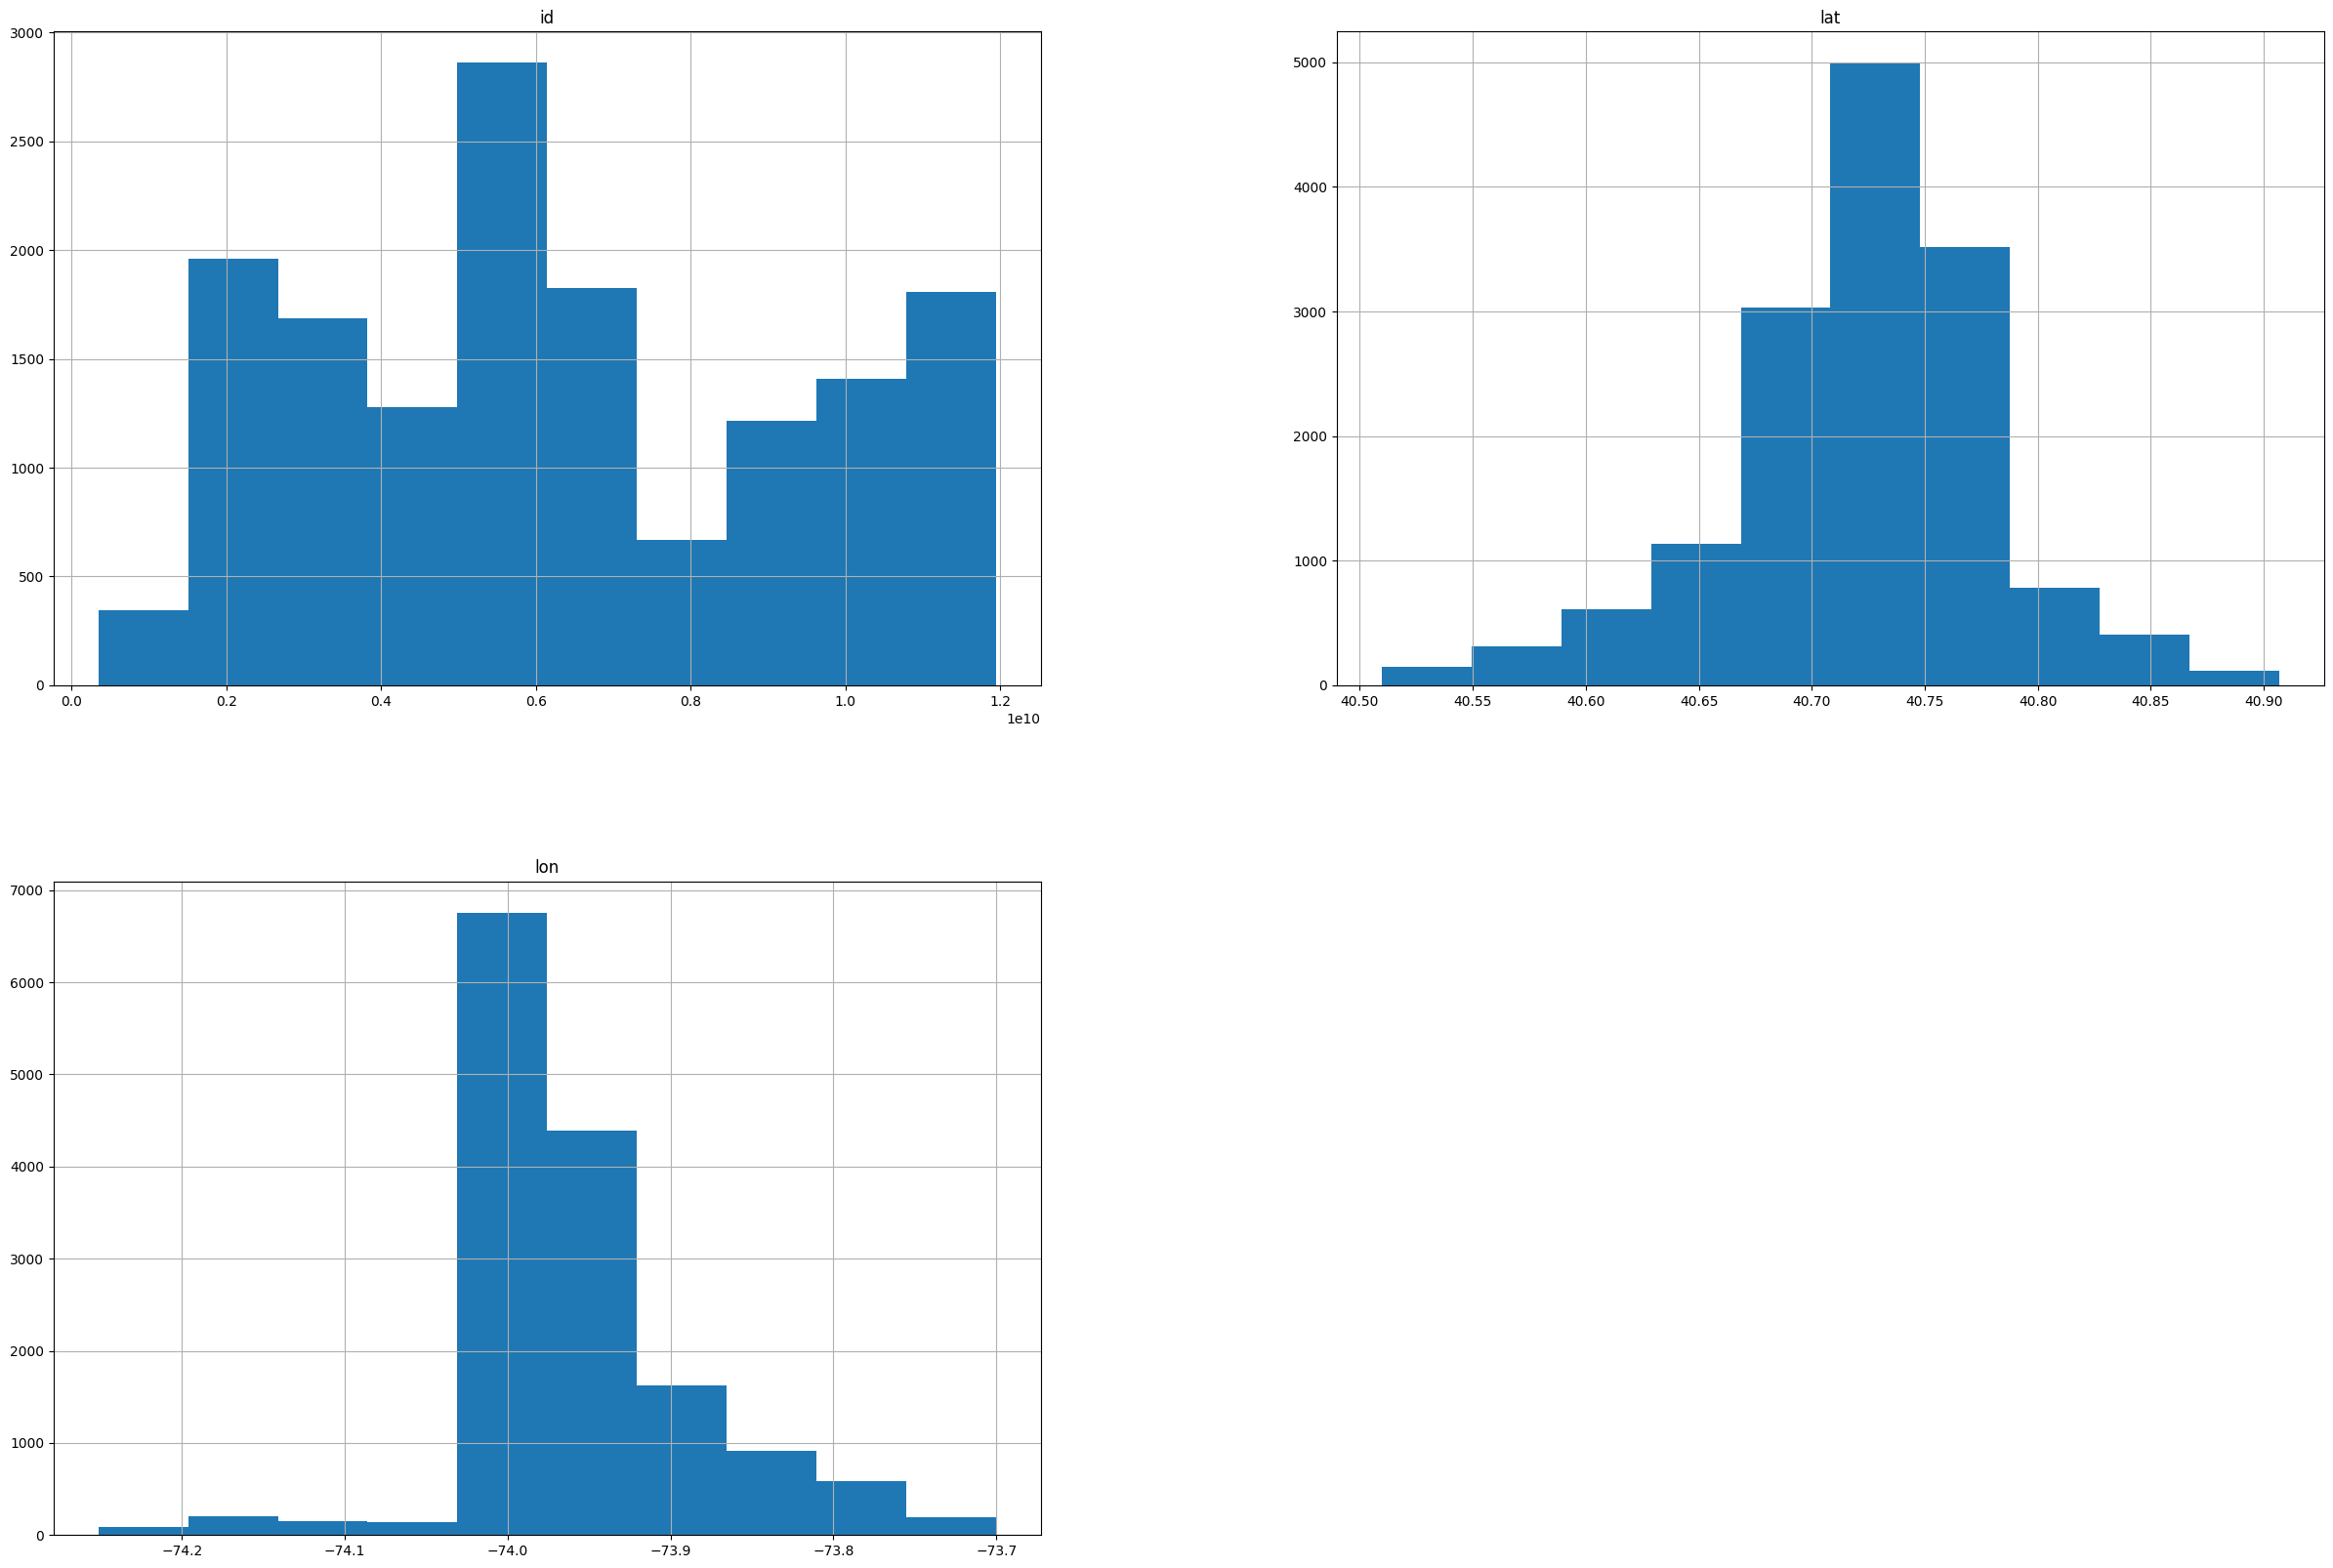

In [67]:
# Plot them all together instead
plt.figure()
df.hist(figsize=(30, 20))


C:\Users\Daniel\AppData\Local\Temp\ipykernel_12908\3764306759.py:27: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


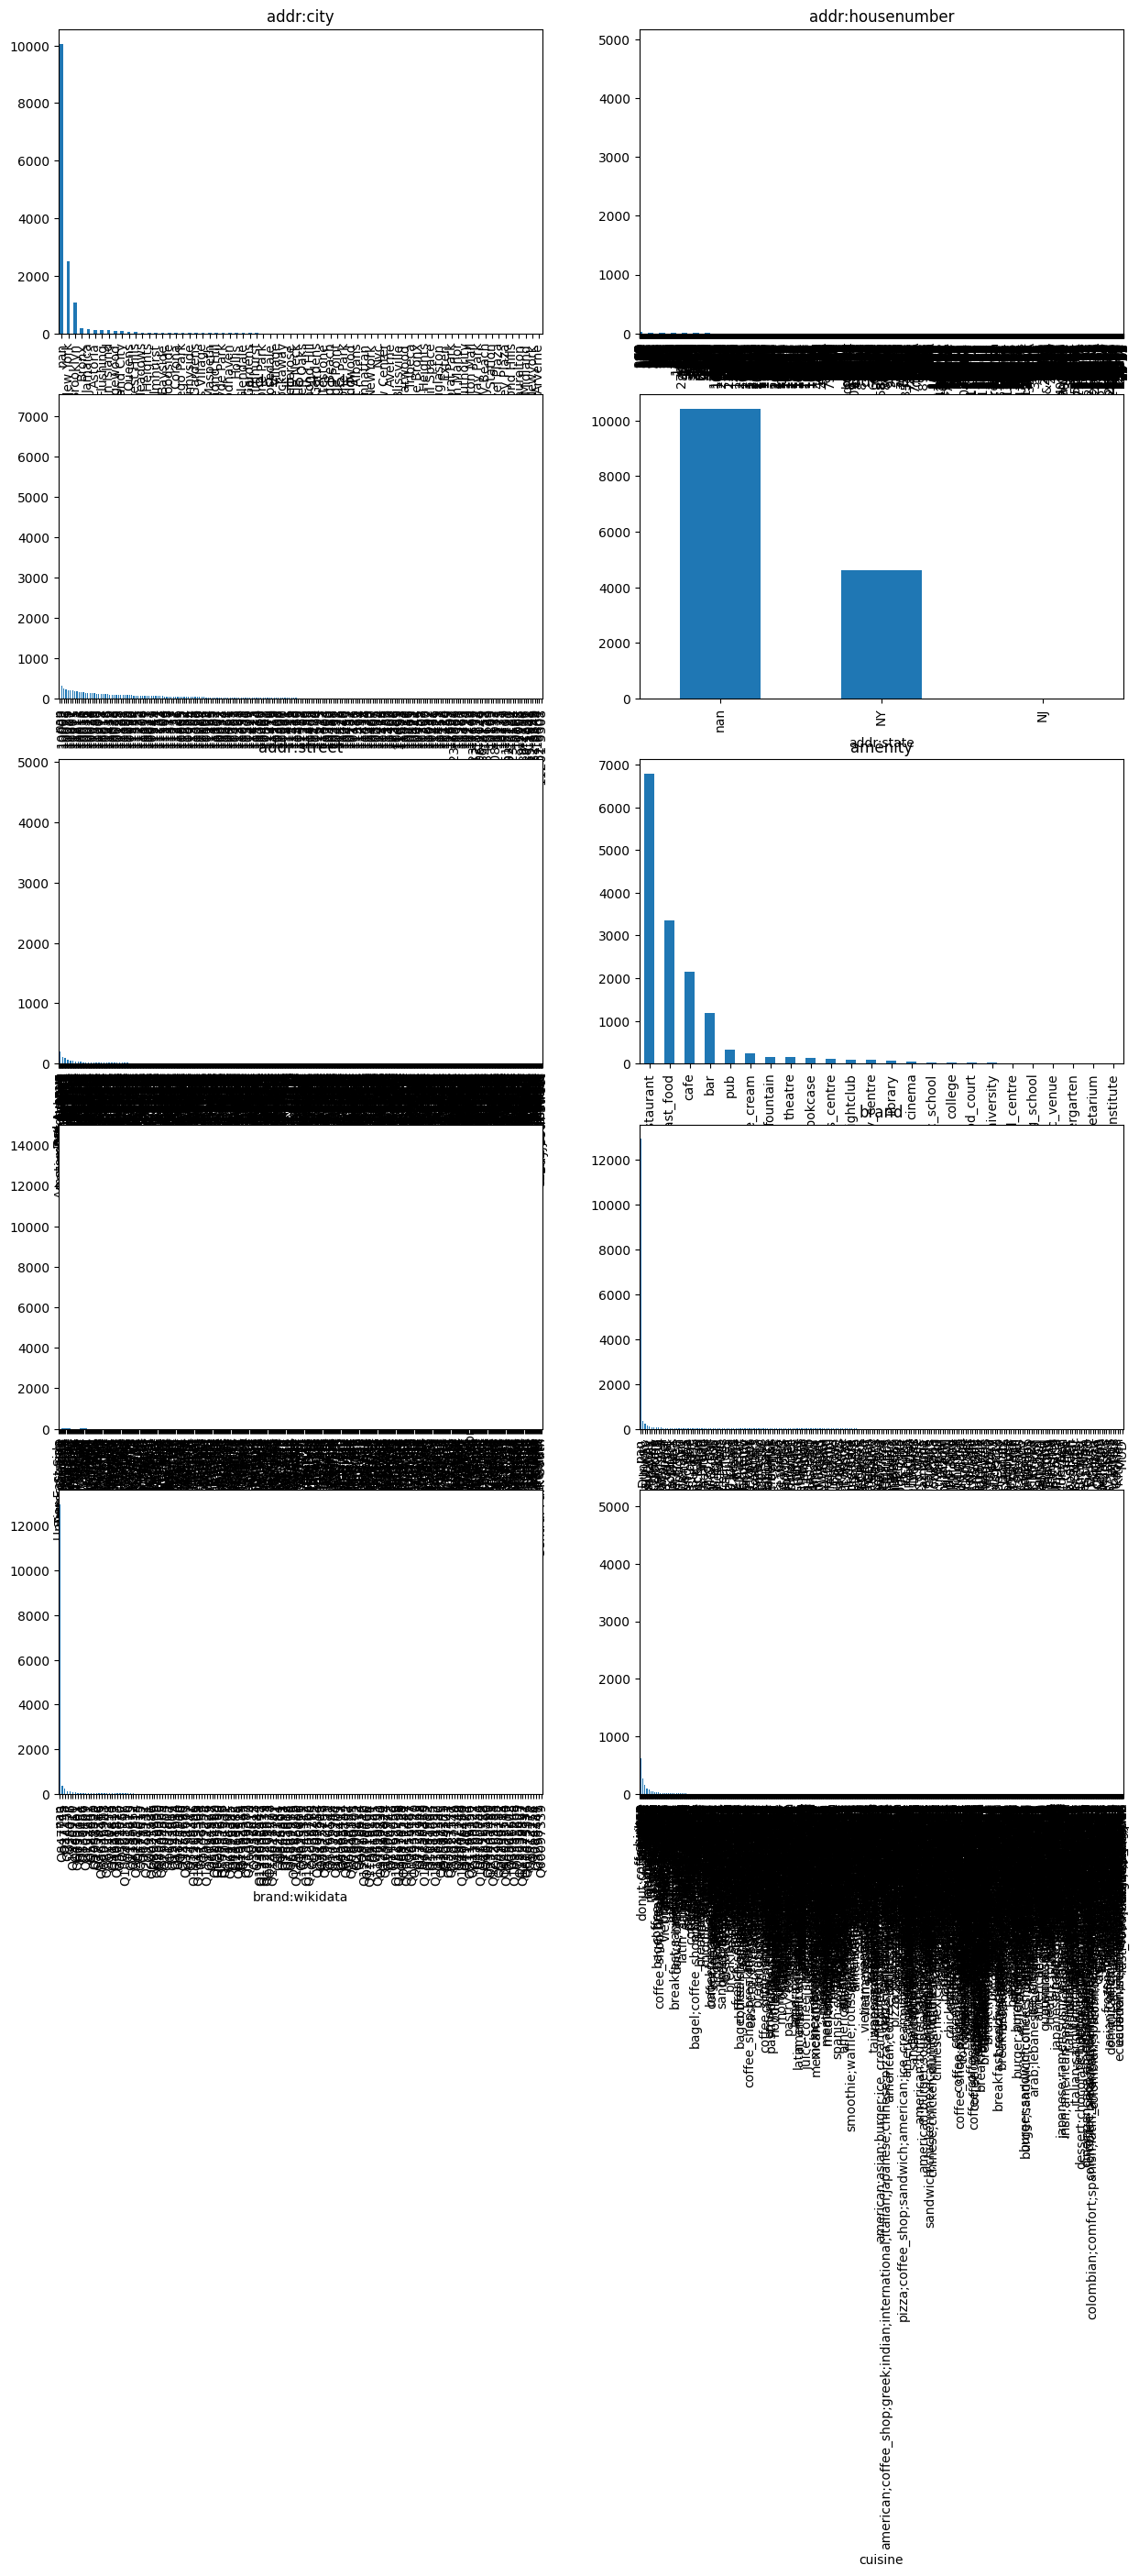

C:\Users\Daniel\AppData\Local\Temp\ipykernel_12908\3764306759.py:27: UserWarning: Glyph 22812 (\N{CJK UNIFIED IDEOGRAPH-591C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Daniel\AppData\Local\Temp\ipykernel_12908\3764306759.py:27: UserWarning: Glyph 23476 (\N{CJK UNIFIED IDEOGRAPH-5BB4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Daniel\AppData\Local\Temp\ipykernel_12908\3764306759.py:27: UserWarning: Glyph 22825 (\N{CJK UNIFIED IDEOGRAPH-5929}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Daniel\AppData\Local\Temp\ipykernel_12908\3764306759.py:27: UserWarning: Glyph 24220 (\N{CJK UNIFIED IDEOGRAPH-5E9C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Daniel\AppData\Local\Temp\ipykernel_12908\3764306759.py:27: UserWarning: Glyph 27155 (\N{CJK UNIFIED IDEOGRAPH-6A13}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Daniel\AppData\Local\Temp\ipykernel_12908\3764306759.py:27: UserWarning: Glyph 27

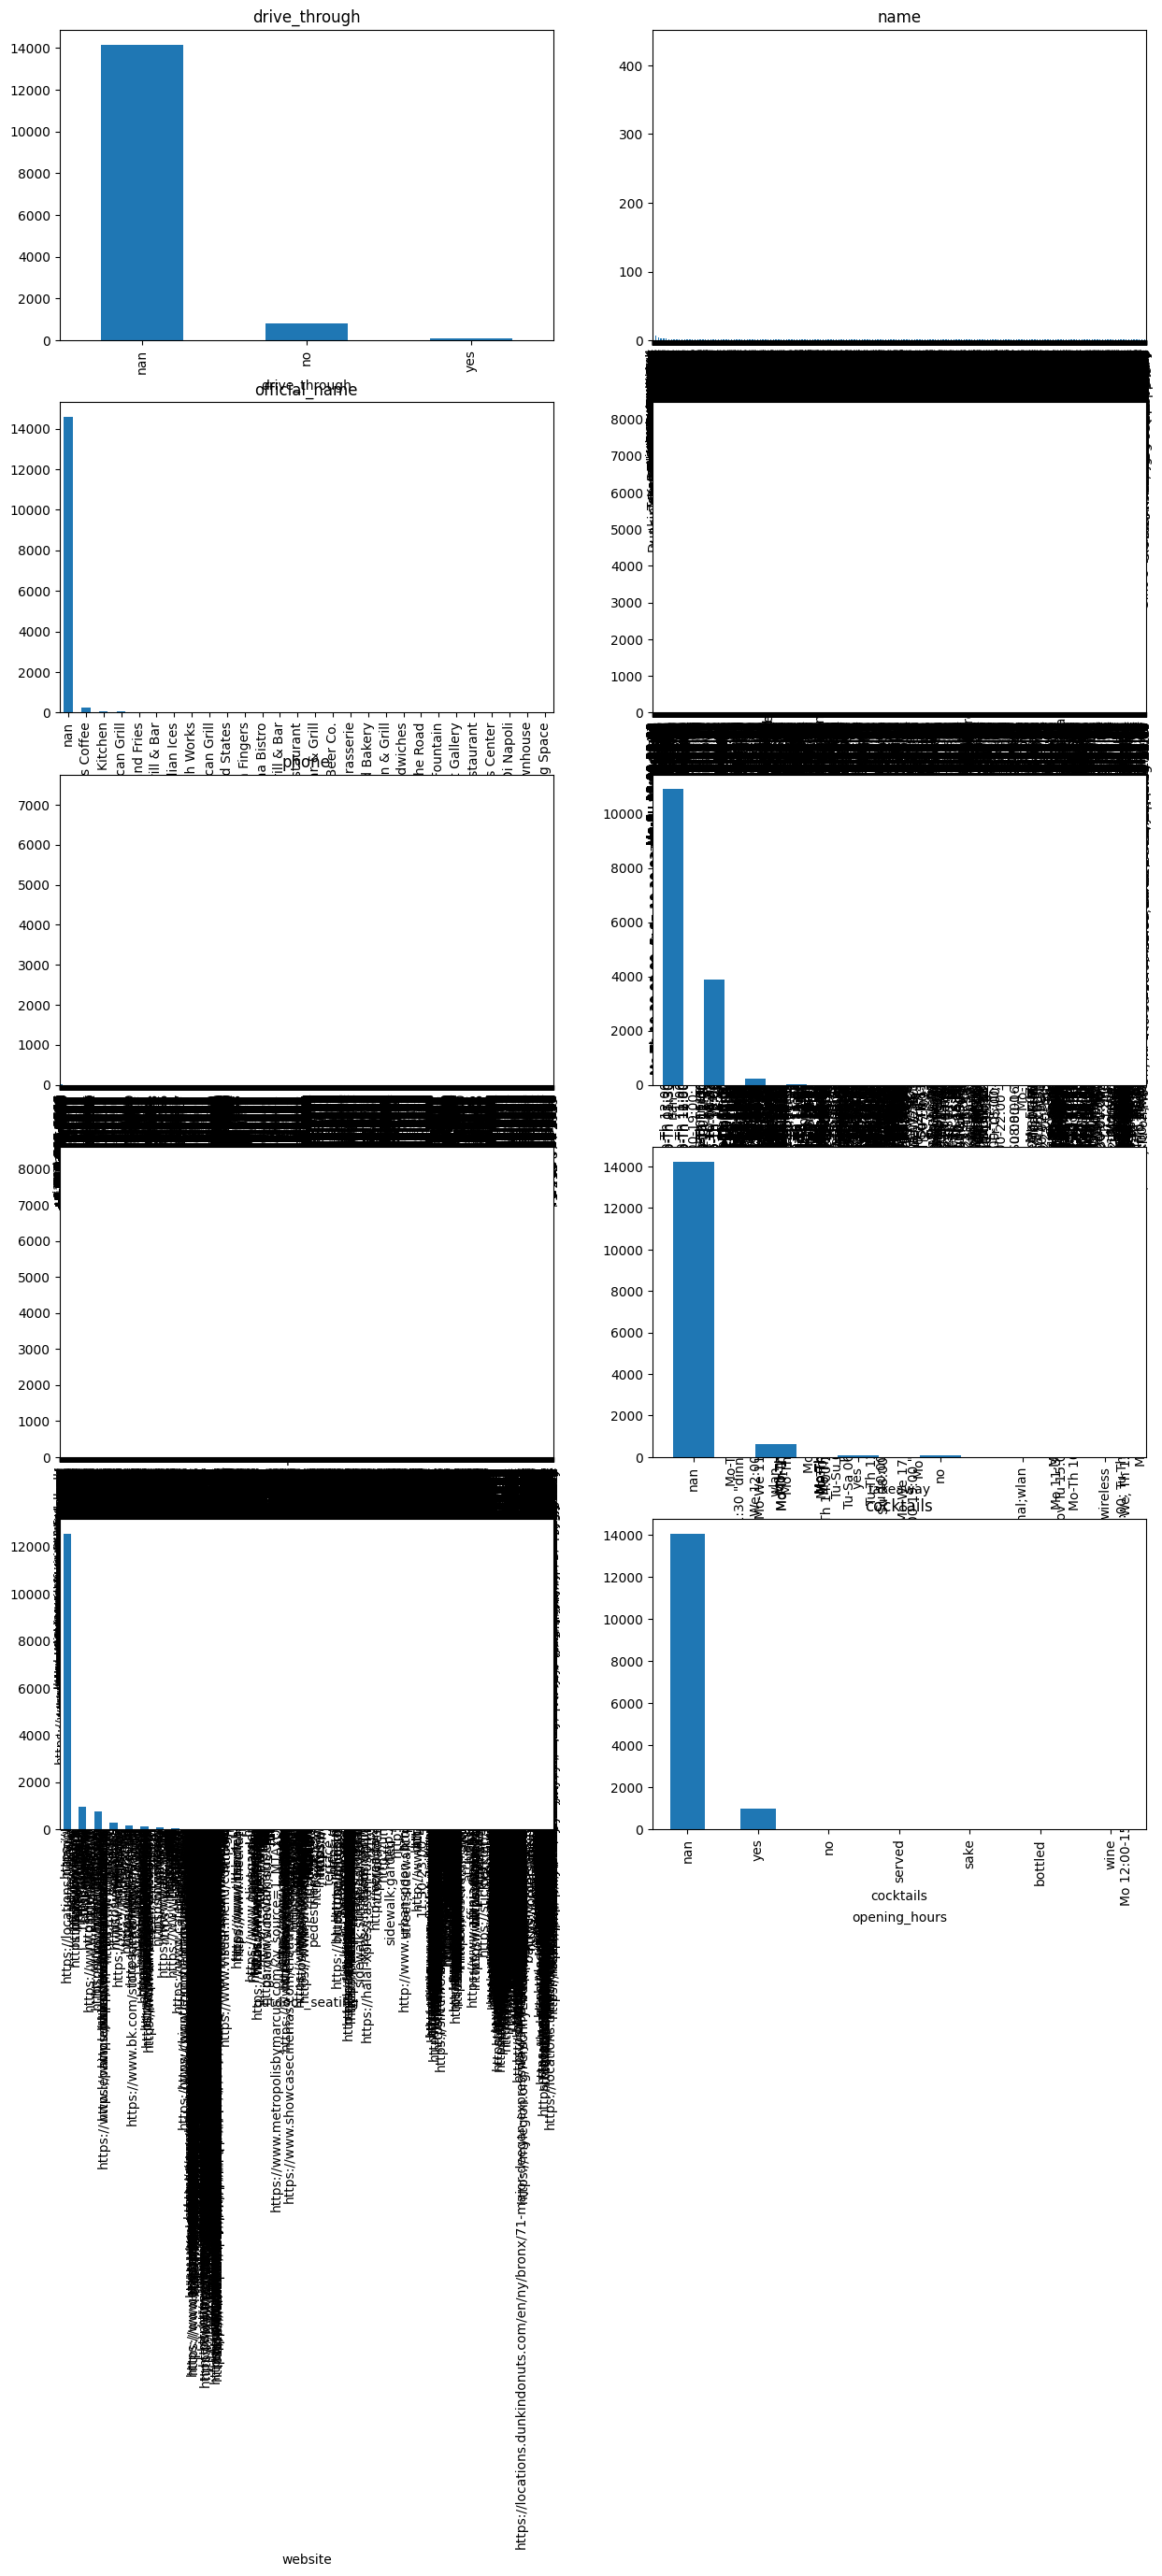

C:\Users\Daniel\AppData\Local\Temp\ipykernel_12908\3764306759.py:27: UserWarning: Glyph 12510 (\N{KATAKANA LETTER MA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Daniel\AppData\Local\Temp\ipykernel_12908\3764306759.py:27: UserWarning: Glyph 12424 (\N{HIRAGANA LETTER YO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Daniel\AppData\Local\Temp\ipykernel_12908\3764306759.py:27: UserWarning: Glyph 12375 (\N{HIRAGANA LETTER SI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Daniel\AppData\Local\Temp\ipykernel_12908\3764306759.py:27: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()
c:\Users\Daniel\miniconda3\envs\COMP47360\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12510 (\N{KATAKANA LETTER MA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Daniel\miniconda3\envs\COMP47360\Li

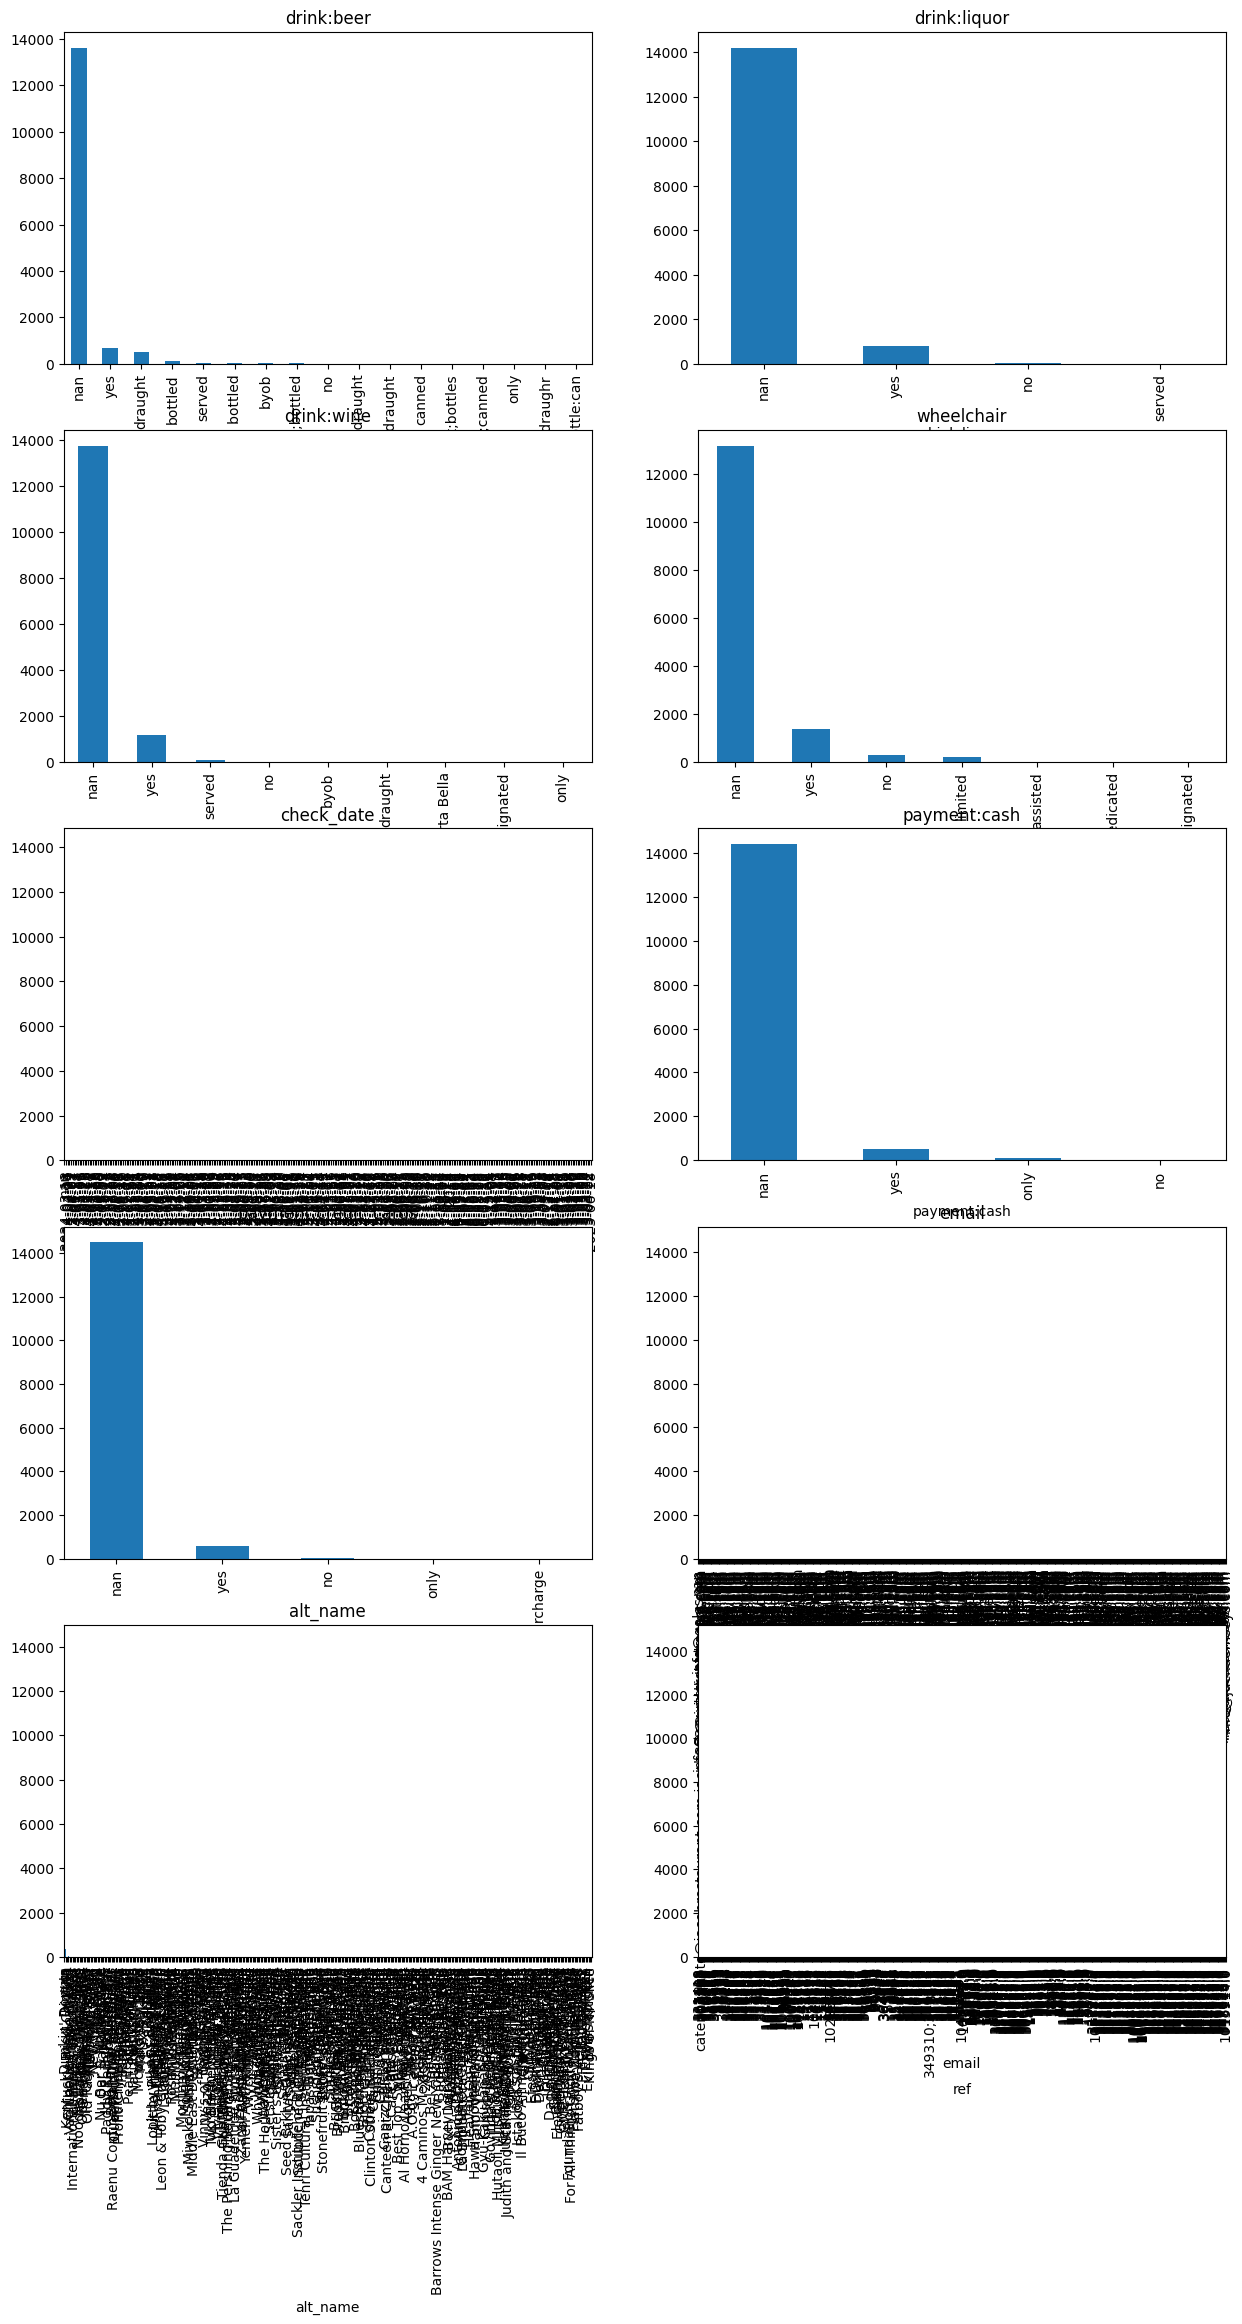

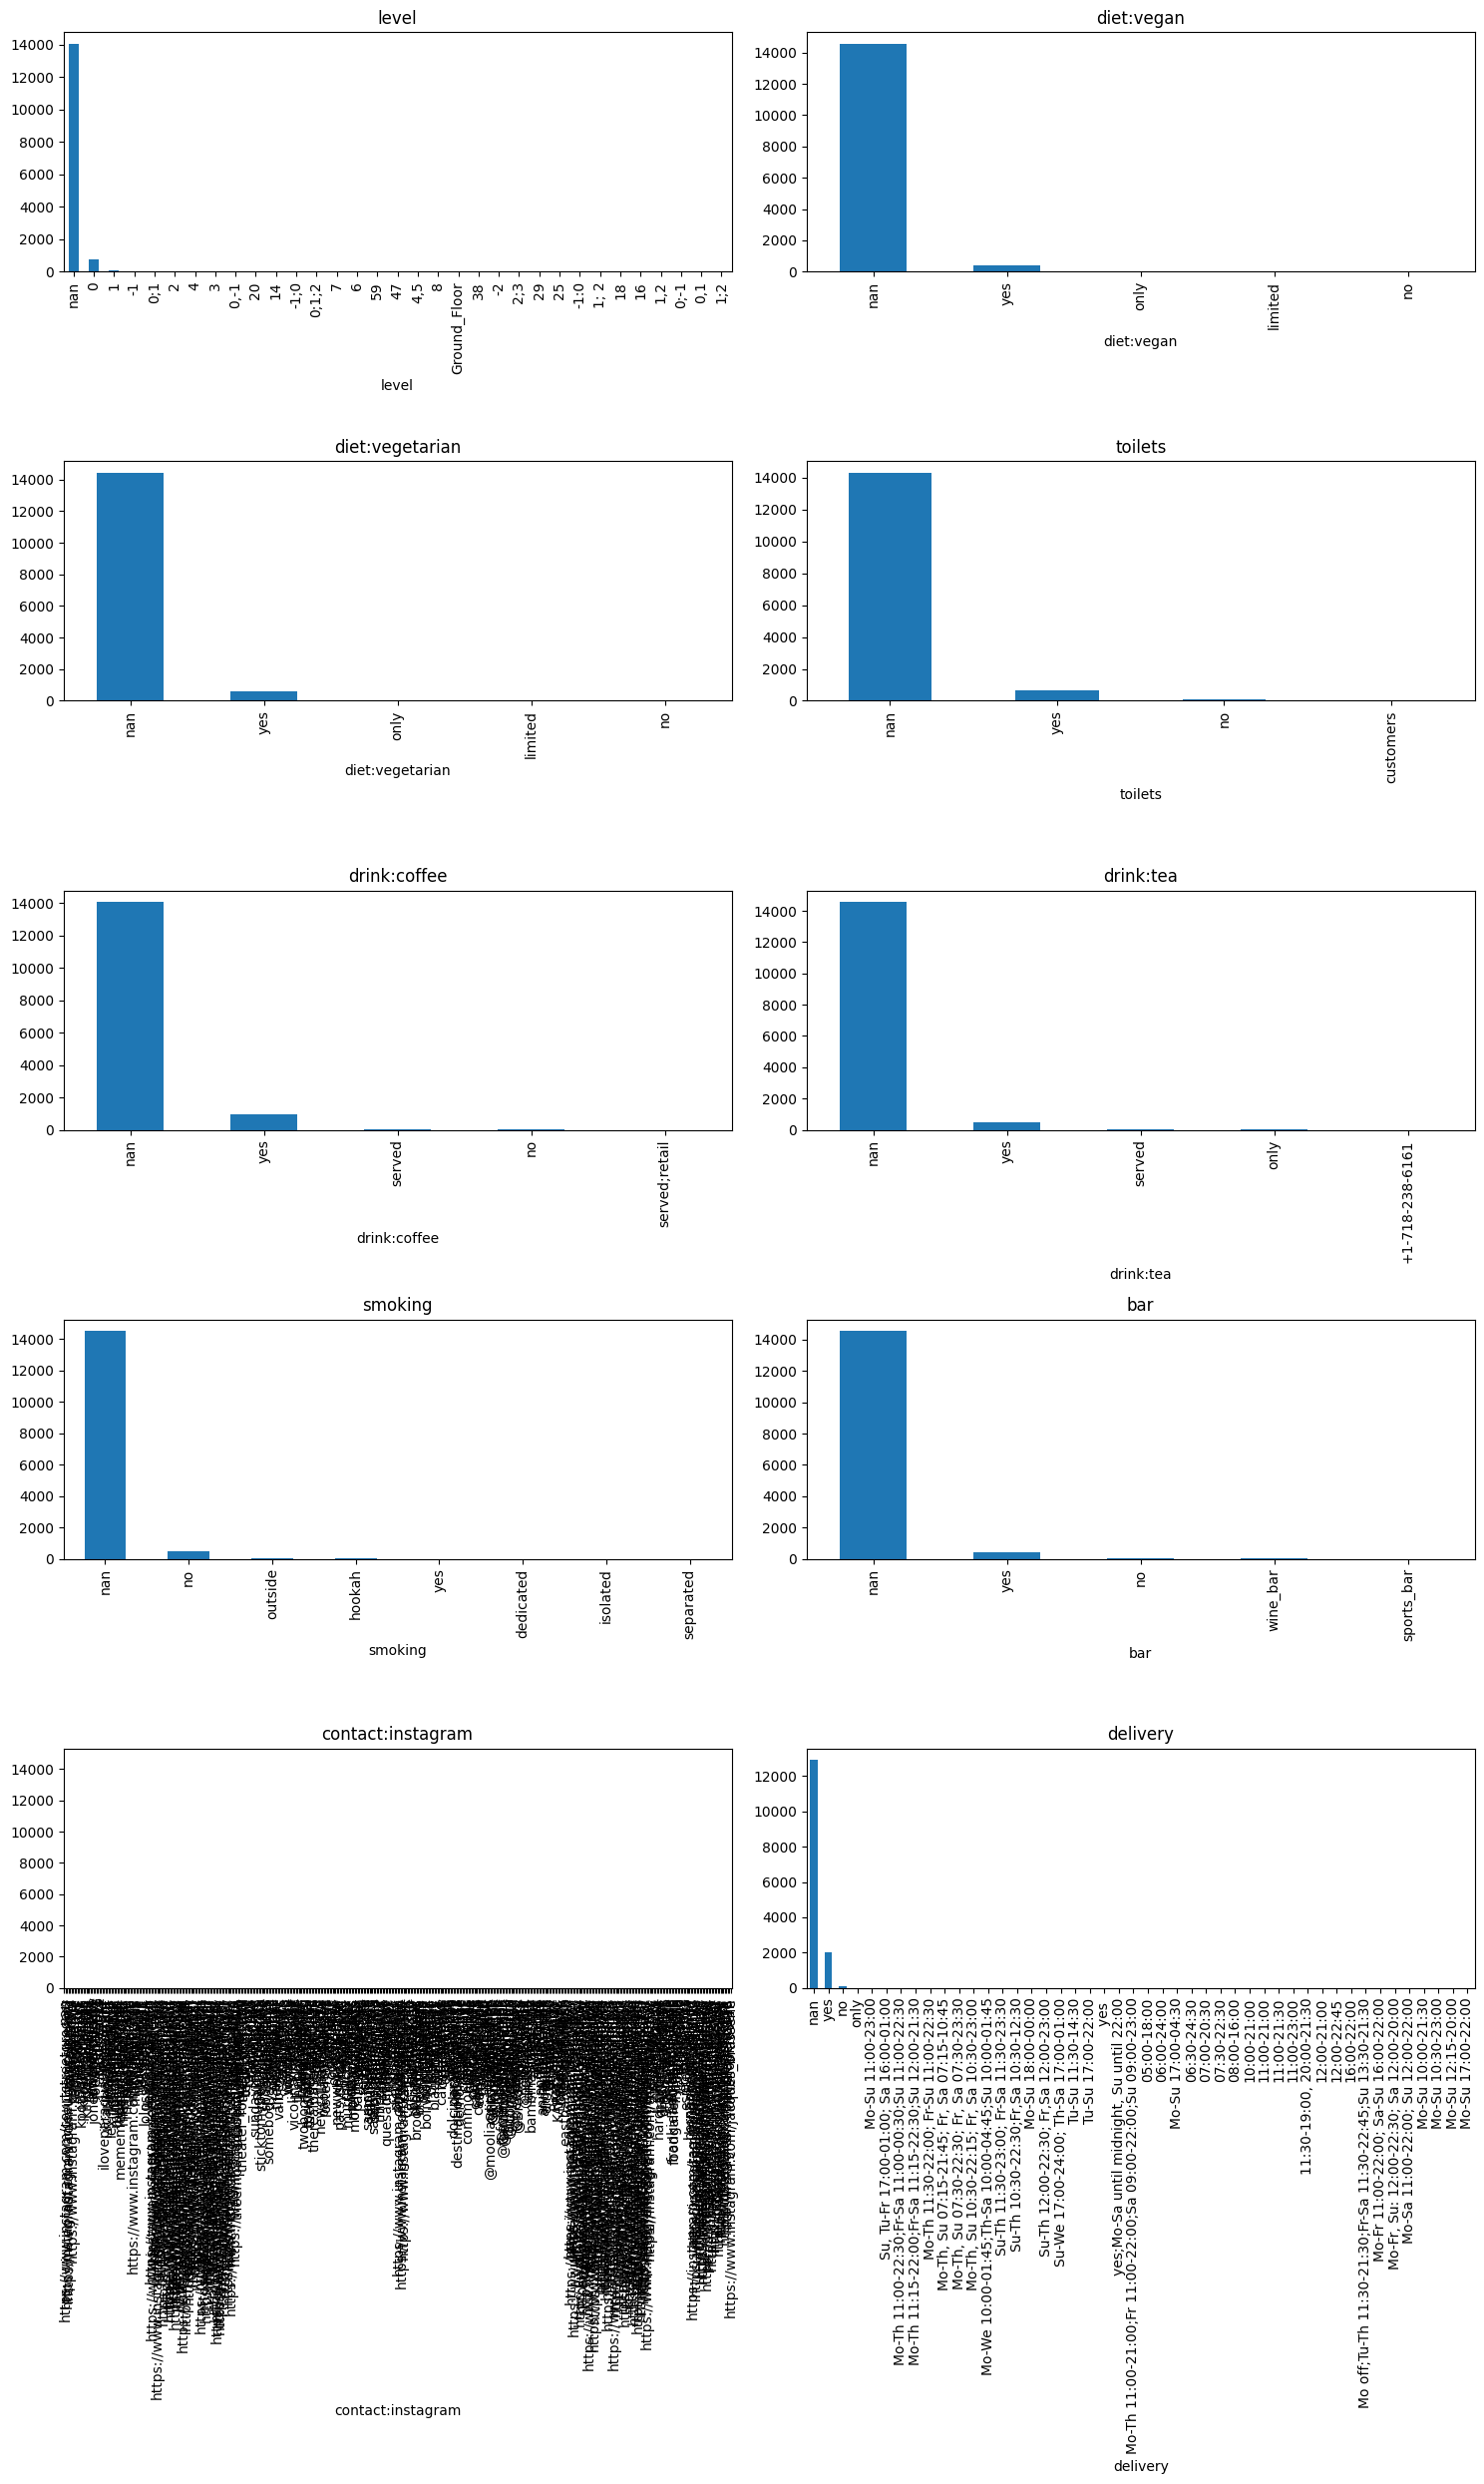

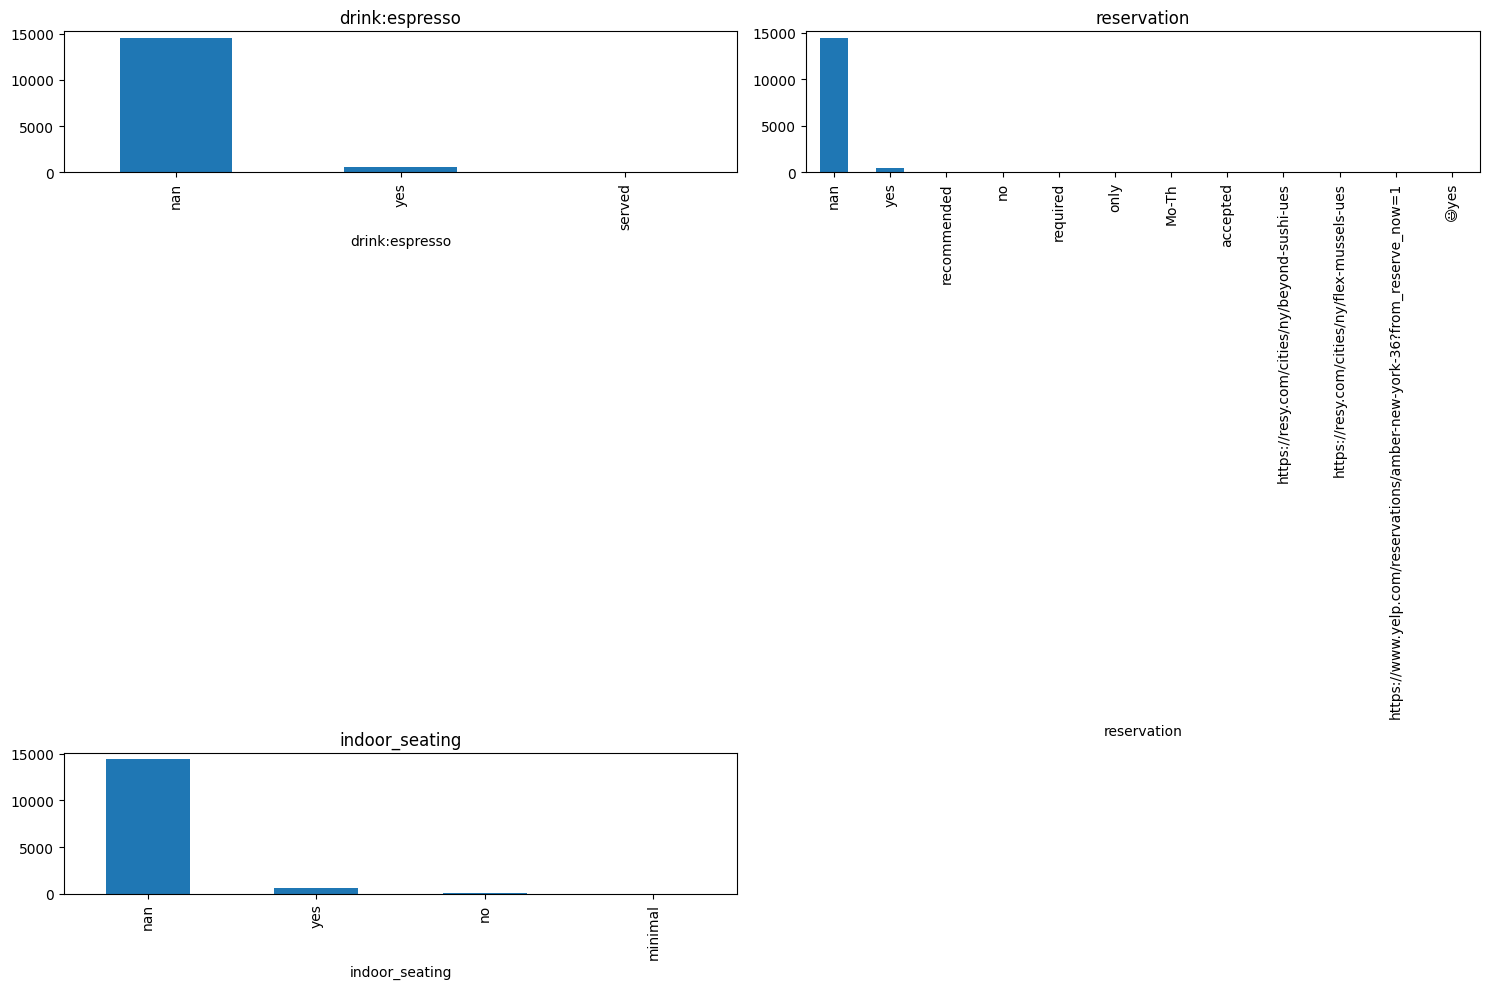

In [75]:
# Change code to produce new figure every 10 plots
num_cols = 2
plots_per_fig = 10
num_figures = (len(category_columns) + plots_per_fig -1)//plots_per_fig

for i in range(num_figures):
    
    current_cols = category_columns[i*plots_per_fig: min(len(category_columns), (i+1)*plots_per_fig )]
    # Plot categoric columns
    num_rows = (len(current_cols) + 1) // 2

    # Create a single figure with subplots arranged in a 2-column grid
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5*num_rows))

    # Flatten the axes array to simplify indexing
    axes = axes.flatten()

    # Iterate over each column
    for i, column in enumerate(current_cols):
        # Plot each bar plot on its corresponding subplot
        df[column].value_counts(dropna=False).plot(kind='bar', ax=axes[i])
        axes[i].set_title(column)

    for j in range(len(current_cols), num_rows * 2):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


In [69]:
# Look once again at the summary stats table for categorical features
df_table_categoric = df[category_columns].describe().T
category_columns_perc_missing  = 100 * (df[category_columns].isnull().sum()/df.shape[0])
df_category_perc_missing = pd.DataFrame(category_columns_perc_missing, columns=['%missing'])
# cardinality
category_columns_card = df[category_columns].nunique()
df_category_card = pd.DataFrame(category_columns_card, columns=['card'])

In [70]:
second_val = []
second_freq = []
for category in category_columns:
    # print(df[category].value_counts().index.tolist())
    if len(df[category].value_counts().index.tolist()) > 1:
        second_val.append(df[category].value_counts().index.tolist()[1])
        second_freq.append(df[category].value_counts().iloc[1])
    else:
        second_val.append("None")
        second_freq.append(0)

In [71]:
# Concatenate numeric, missing and cardinality cols
df_categoric_columns_data_quality_report_table = pd.concat([df_table_categoric, df_category_perc_missing, df_category_card], axis=1)

df_categoric_columns_data_quality_report_table['second'] = second_val
df_categoric_columns_data_quality_report_table['second_freq'] = second_freq

df_categoric_columns_data_quality_report_table = df_categoric_columns_data_quality_report_table[['count', 'unique', 'top', 'freq', 'second', 'second_freq', '%missing', 'card']]
# Print data quality report table for numeric features to a file.
df_categoric_columns_data_quality_report_table.to_csv("OSM-Amenities-DataQualityReport-CategoricFeatures-Table.csv", 
                                         index_label='Feature')
df_categoric_columns_data_quality_report_table

,count,unique,top,freq,second,second_freq,%missing,card
addr:city,4991,71,New York,2493,Brooklyn,1083,66.848223,71
addr:housenumber,10134,4269,2,41,1,38,32.686815,4269
addr:postcode,7870,220,10003,327,10002,246,47.725008,220
addr:state,4633,2,NY,4632,NJ,1,69.226171,2
addr:street,10257,1243,Broadway,495,3rd Avenue,270,31.869811,1243
amenity,15055,24,restaurant,6783,fast_food,3355,0.000000,24
branch,745,501,Upper East Side,43,Times Square,15,95.051478,501
brand,2136,212,Dunkin',344,Starbucks,248,85.812023,212
brand:wikidata,2083,183,Q847743,346,Q37158,247,86.164065,183
cuisine,10020,1303,pizza,876,chinese,731,33.444039,1303


In [72]:
# Concatenate numeric, missing and cardinality cols
df_numeric_columns_data_quality_report_table = pd.concat([df_table_numeric, df_numeric_missing, df_numeric_card], axis=1)

# Print data quality report table for numeric features to a file.
df_numeric_columns_data_quality_report_table.to_csv("OSM-Amenities-DataQualityReport-NumericFeatures-Table.csv", 
                                         index_label='Feature')
df_numeric_columns_data_quality_report_table

,count,mean,std,min,25%,50%,75%,max,%missing,card
id,15055.0,6.328566e+09,3.102157e+09,3.493238e+08,3.581358e+09,5.871959e+09,9.241599e+09,1.194371e+10,0.0,15055
lat,15055.0,4.072131e+01,5.830810e-02,4.050973e+01,4.069008e+01,4.072665e+01,4.075634e+01,4.090678e+01,0.0,14986
lon,15055.0,-7.395595e+01,7.164192e-02,-7.425136e+01,-7.399174e+01,-7.397392e+01,-7.392907e+01,-7.370026e+01,0.0,14967


### Logical Integrity Tests 
1. Address State not NY.
2. Website doesn't start with https://
3. 
4. 
